### Read .txt file as TSV

In [1]:
import pandas as pd
df = pd.read_csv('../data/wk5/output.txt',sep='\t')
df.head()

,Filename,Label,seg_Start,seg_End,t_ms,H1H2c,CPP,HNR05,soe,Unnamed: 9
0,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,203.0,0.000,14.258,24.493,0.00,NaN
1,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,204.0,0.000,14.259,22.951,0.00,NaN
2,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,205.0,4.518,14.370,21.282,0.01,NaN
3,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,206.0,4.095,14.432,19.389,0.00,NaN
4,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,207.0,3.672,14.398,18.012,0.00,NaN


### Filter out SOE==0

In [2]:
df_filtered = df[df['soe']!=0]
print(f"df rows:{len(df)}")
print(f"df_filtered rows:{len(df_filtered)}")
df_filtered.head()

df rows:3089
df_filtered rows:456


,Filename,Label,seg_Start,seg_End,t_ms,H1H2c,CPP,HNR05,soe,Unnamed: 9
2,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,205.0,4.518,14.370,21.282,0.010,NaN
5,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,208.0,3.623,14.424,16.968,0.004,NaN
8,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,211.0,2.525,14.792,15.400,0.016,NaN
10,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,213.0,1.182,15.108,14.626,0.002,NaN
13,162-milk-imp-sg-HKD.mat,ɪ RTR,203.354,271.319,216.0,0.855,15.185,13.691,0.018,NaN


### make IPA and group columns

In [3]:
df_filtered['IPA']=df_filtered['Label'].apply(lambda x: x.split()[0])
df_filtered['group']=df_filtered['Label'].apply(lambda x: x.split()[1])
df_clean = df_filtered[['Filename','seg_Start','seg_End','t_ms','H1H2c','CPP','HNR05','soe','IPA','group']]
df_clean.head()

/var/folders/85/h9zn7p197rv7q9qq734vvvsr0000gn/T/ipykernel_98145/1794473935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['IPA']=df_filtered['Label'].apply(lambda x: x.split()[0])
/var/folders/85/h9zn7p197rv7q9qq734vvvsr0000gn/T/ipykernel_98145/1794473935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['group']=df_filtered['Label'].apply(lambda x: x.split()[1])


,Filename,seg_Start,seg_End,t_ms,H1H2c,CPP,HNR05,soe,IPA,group
2,162-milk-imp-sg-HKD.mat,203.354,271.319,205.0,4.518,14.370,21.282,0.010,ɪ,RTR
5,162-milk-imp-sg-HKD.mat,203.354,271.319,208.0,3.623,14.424,16.968,0.004,ɪ,RTR
8,162-milk-imp-sg-HKD.mat,203.354,271.319,211.0,2.525,14.792,15.400,0.016,ɪ,RTR
10,162-milk-imp-sg-HKD.mat,203.354,271.319,213.0,1.182,15.108,14.626,0.002,ɪ,RTR
13,162-milk-imp-sg-HKD.mat,203.354,271.319,216.0,0.855,15.185,13.691,0.018,ɪ,RTR


### Plot 2 figures with means and SD ellipses: 
- Fig 1: H1*-H2* by CPP
- Fig 2: SoE by HNR <500 Hz

In [4]:
df = df_clean

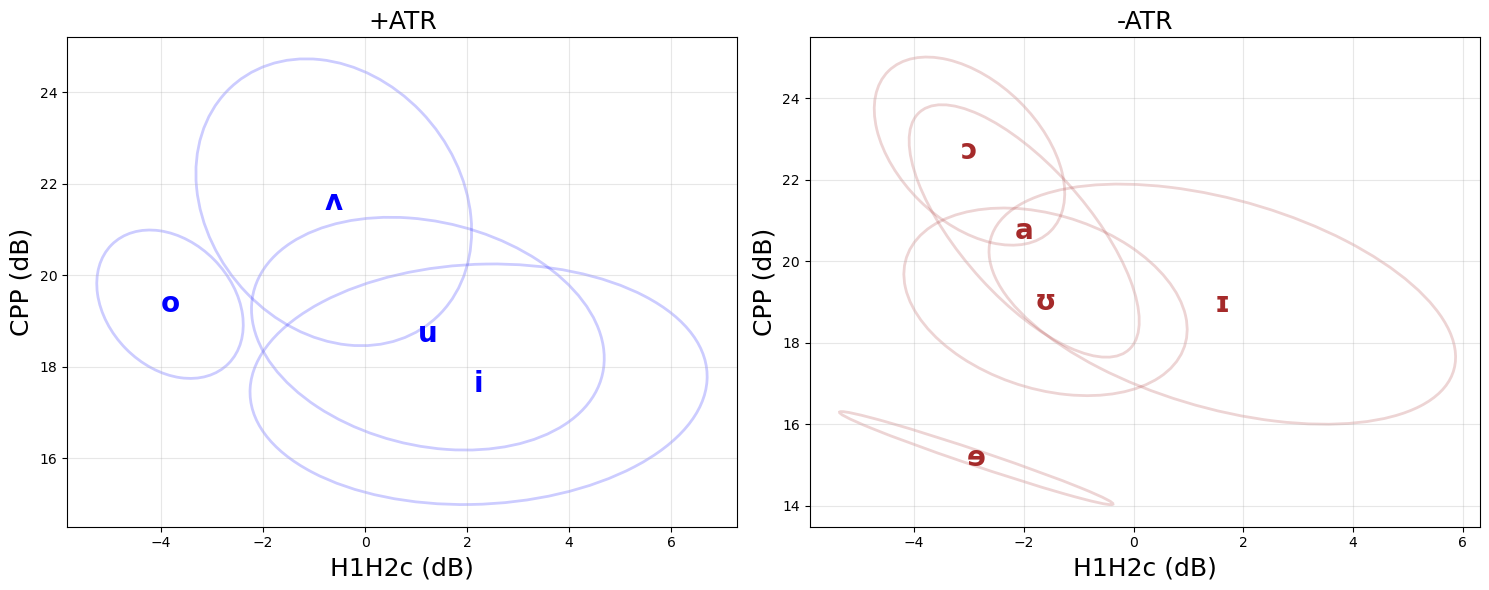

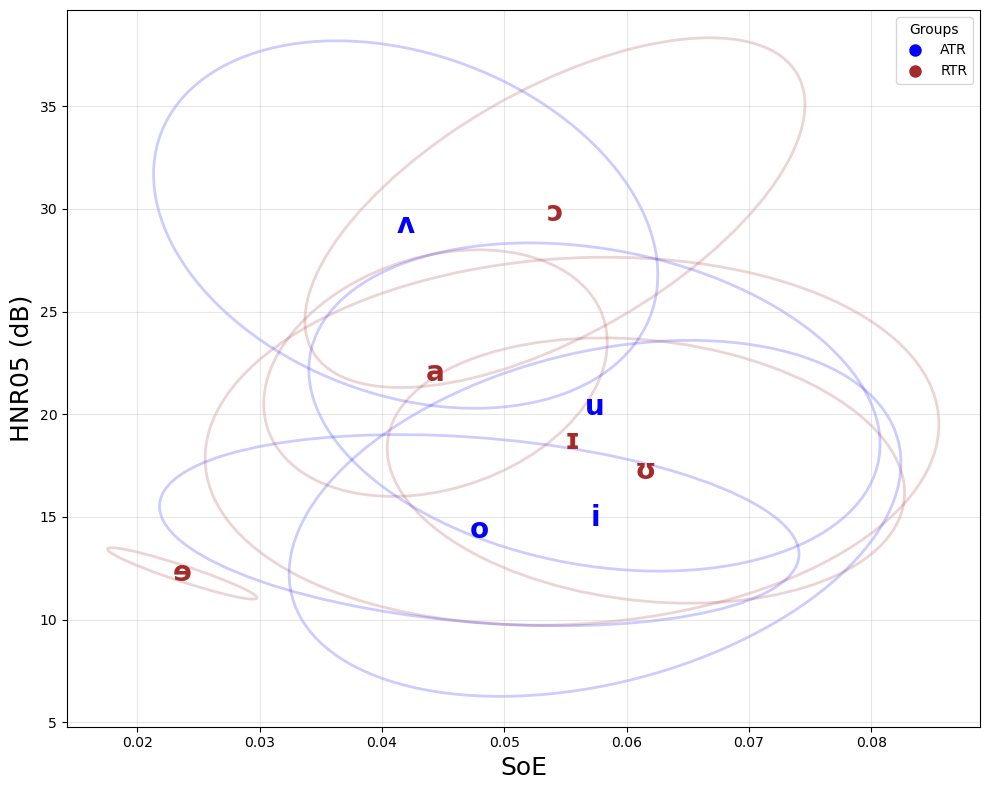

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Function to create confidence ellipse
def confidence_ellipse(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    # Using a special case to obtain the eigenvalues of this two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    
    # Calculating the standard deviation of x from the square root of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # calculating the standard deviation of y and multiplying with the given number of standard deviations.
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Assuming your dataframe is called 'df'
# Define group colors
group_colors = {'ATR': 'blue', 'RTR': 'brown'}

# Figure 1: H1H2c by CPP - Split by ATR and RTR groups
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: ATR group
atr_data = df[df['group'] == 'ATR']
for ipa in atr_data['IPA'].unique():
    ipa_data = atr_data[atr_data['IPA'] == ipa]
    
    if len(ipa_data) > 0:
        # Get mean values for this IPA group
        mean_h1h2c = ipa_data['H1H2c'].mean()
        mean_cpp = ipa_data['CPP'].mean()
        
        # Plot mean point with ATR color (blue)
        ax1.scatter(mean_h1h2c, mean_cpp, c='blue', s=150, alpha=0, 
                   edgecolors='black', linewidth=1.5)
        
        # Add IPA label at the center of the circle
        ax1.annotate(ipa, (mean_h1h2c, mean_cpp), 
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='center', fontsize=20, fontweight='bold',
                    color='blue')
        
        # Add standard deviation ellipse
        if len(ipa_data) > 2:  # Need at least 3 points for ellipse
            confidence_ellipse(ipa_data['H1H2c'].values, ipa_data['CPP'].values, 
                              ax1, n_std=1.0, edgecolor='blue', linewidth=2, alpha=0.2)

ax1.set_xlabel('H1H2c (dB)', fontsize=18)
ax1.set_ylabel('CPP (dB)', fontsize=18)
ax1.set_title('+ATR', fontsize=18)
ax1.grid(True, alpha=0.3)

# Subplot 2: RTR group
rtr_data = df[df['group'] == 'RTR']
for ipa in rtr_data['IPA'].unique():
    ipa_data = rtr_data[rtr_data['IPA'] == ipa]
    
    if len(ipa_data) > 0:
        # Get mean values for this IPA group
        mean_h1h2c = ipa_data['H1H2c'].mean()
        mean_cpp = ipa_data['CPP'].mean()
        
        # Plot mean point with RTR color (brown)
        ax2.scatter(mean_h1h2c, mean_cpp, c='brown', s=150, alpha=0, 
                   edgecolors='black', linewidth=1.5)
        
        # Add IPA label at the center of the circle
        ax2.annotate(ipa, (mean_h1h2c, mean_cpp), 
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='center', fontsize=20, fontweight='bold',
                    color='brown')
        
        # Add standard deviation ellipse
        if len(ipa_data) > 2:  # Need at least 3 points for ellipse
            confidence_ellipse(ipa_data['H1H2c'].values, ipa_data['CPP'].values, 
                              ax2, n_std=1.0, edgecolor='brown', linewidth=2, alpha=0.2)

ax2.set_xlabel('H1H2c (dB)', fontsize=18)
ax2.set_ylabel('CPP (dB)', fontsize=18)
ax2.set_title('-ATR', fontsize=18)
ax2.grid(True, alpha=0.3)

plt.tight_layout()

# Figure 2: SoE by HNR05 (single plot with all groups)
fig2, ax3 = plt.subplots(figsize=(10, 8))

# Plot all data points, grouped by IPA but colored by group
for ipa in df['IPA'].unique():
    ipa_data = df[df['IPA'] == ipa]
    
    if len(ipa_data) > 0:
        # Get mean values for this IPA group
        mean_soe = ipa_data['soe'].mean()
        mean_hnr05 = ipa_data['HNR05'].mean()
        
        # Get group for coloring
        group = ipa_data['group'].iloc[0]
        color = group_colors.get(group, 'gray')
        
        # Plot mean point
        ax3.scatter(mean_soe, mean_hnr05, c=color, s=150, alpha=0, 
                   edgecolors='black', linewidth=1.5)
        
        # Add IPA label at the center (COLOR BY GROUP - blue for ATR, brown for RTR)
        ax3.annotate(ipa, (mean_soe, mean_hnr05), 
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='center', fontsize=20, fontweight='bold',
                    color=color)
        
        # Add standard deviation ellipse
        if len(ipa_data) > 2:
            confidence_ellipse(ipa_data['soe'].values, ipa_data['HNR05'].values, 
                              ax3, n_std=1.0, edgecolor=color, linewidth=2, alpha=0.2)

ax3.set_xlabel('SoE', fontsize=18)
ax3.set_ylabel('HNR05 (dB)', fontsize=18)
ax3.grid(True, alpha=0.3)

# Create legend for groups
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
           markersize=10, label='ATR'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='brown', 
           markersize=10, label='RTR')
]
ax3.legend(handles=legend_elements, title='Groups', loc='best')

plt.tight_layout()
plt.show()